## Dealing with Data Problems

### Clean the NCAA Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.dpi'] = 600

df_ncaa = pd.read_csv('ncaa_data.csv')

In [2]:
df_ncaa.head()

Team  Rank    Ave  Points  Wins
0     Alabama   1.0  94.99  327.76  12.0
1  Ohio State   2.0  94.98  321.68  10.0
2         LSU   3.0  92.75  295.47   6.0
3     Georgia   4.0  93.49  294.42  12.0
4     Clemson   5.0  94.01  291.06   9.0

In [3]:
pd.set_option("display.precision", 2)

In [4]:
df_ncaa.Team

0               Alabama
1            Ohio State
2                   LSU
3               Georgia
4               Clemson
5                Oregon
6                   USC
7             Texas A&M
8            Notre Dame
9              Oklahoma
10                Miami
11              Florida
12             Michigan
13       North Carolina
14                Texas
15            Wisconsin
16             Ole Miss
17             Maryland
18               Auburn
19             Nebraska
20           Penn State
21        Florida State
22            Tennessee
23                 Iowa
24             Arkansas
25    Mississippi State
26             Missouri
27           California
28                  NaN
29           Pittsburgh
30       Oklahoma State
31                 UCLA
32             Virginia
33                 Utah
34             Kentucky
35             NC State
36           Washington
37       Boston College
38            Minnesota
39              Rutgers
40           Louisville
41              

In [5]:
df_ncaa.describe()

Rank    Ave  Points   Wins
count  54.00  54.00   54.00  54.00
mean   28.93  88.03  223.14   7.69
std    18.74   2.92   41.06   2.83
min     1.00  83.10  149.65   2.00
25%    14.25  86.07  195.78   6.00
50%    27.50  87.24  209.95   7.50
75%    40.75  89.53  254.28  10.00
max    85.00  94.99  327.76  13.00

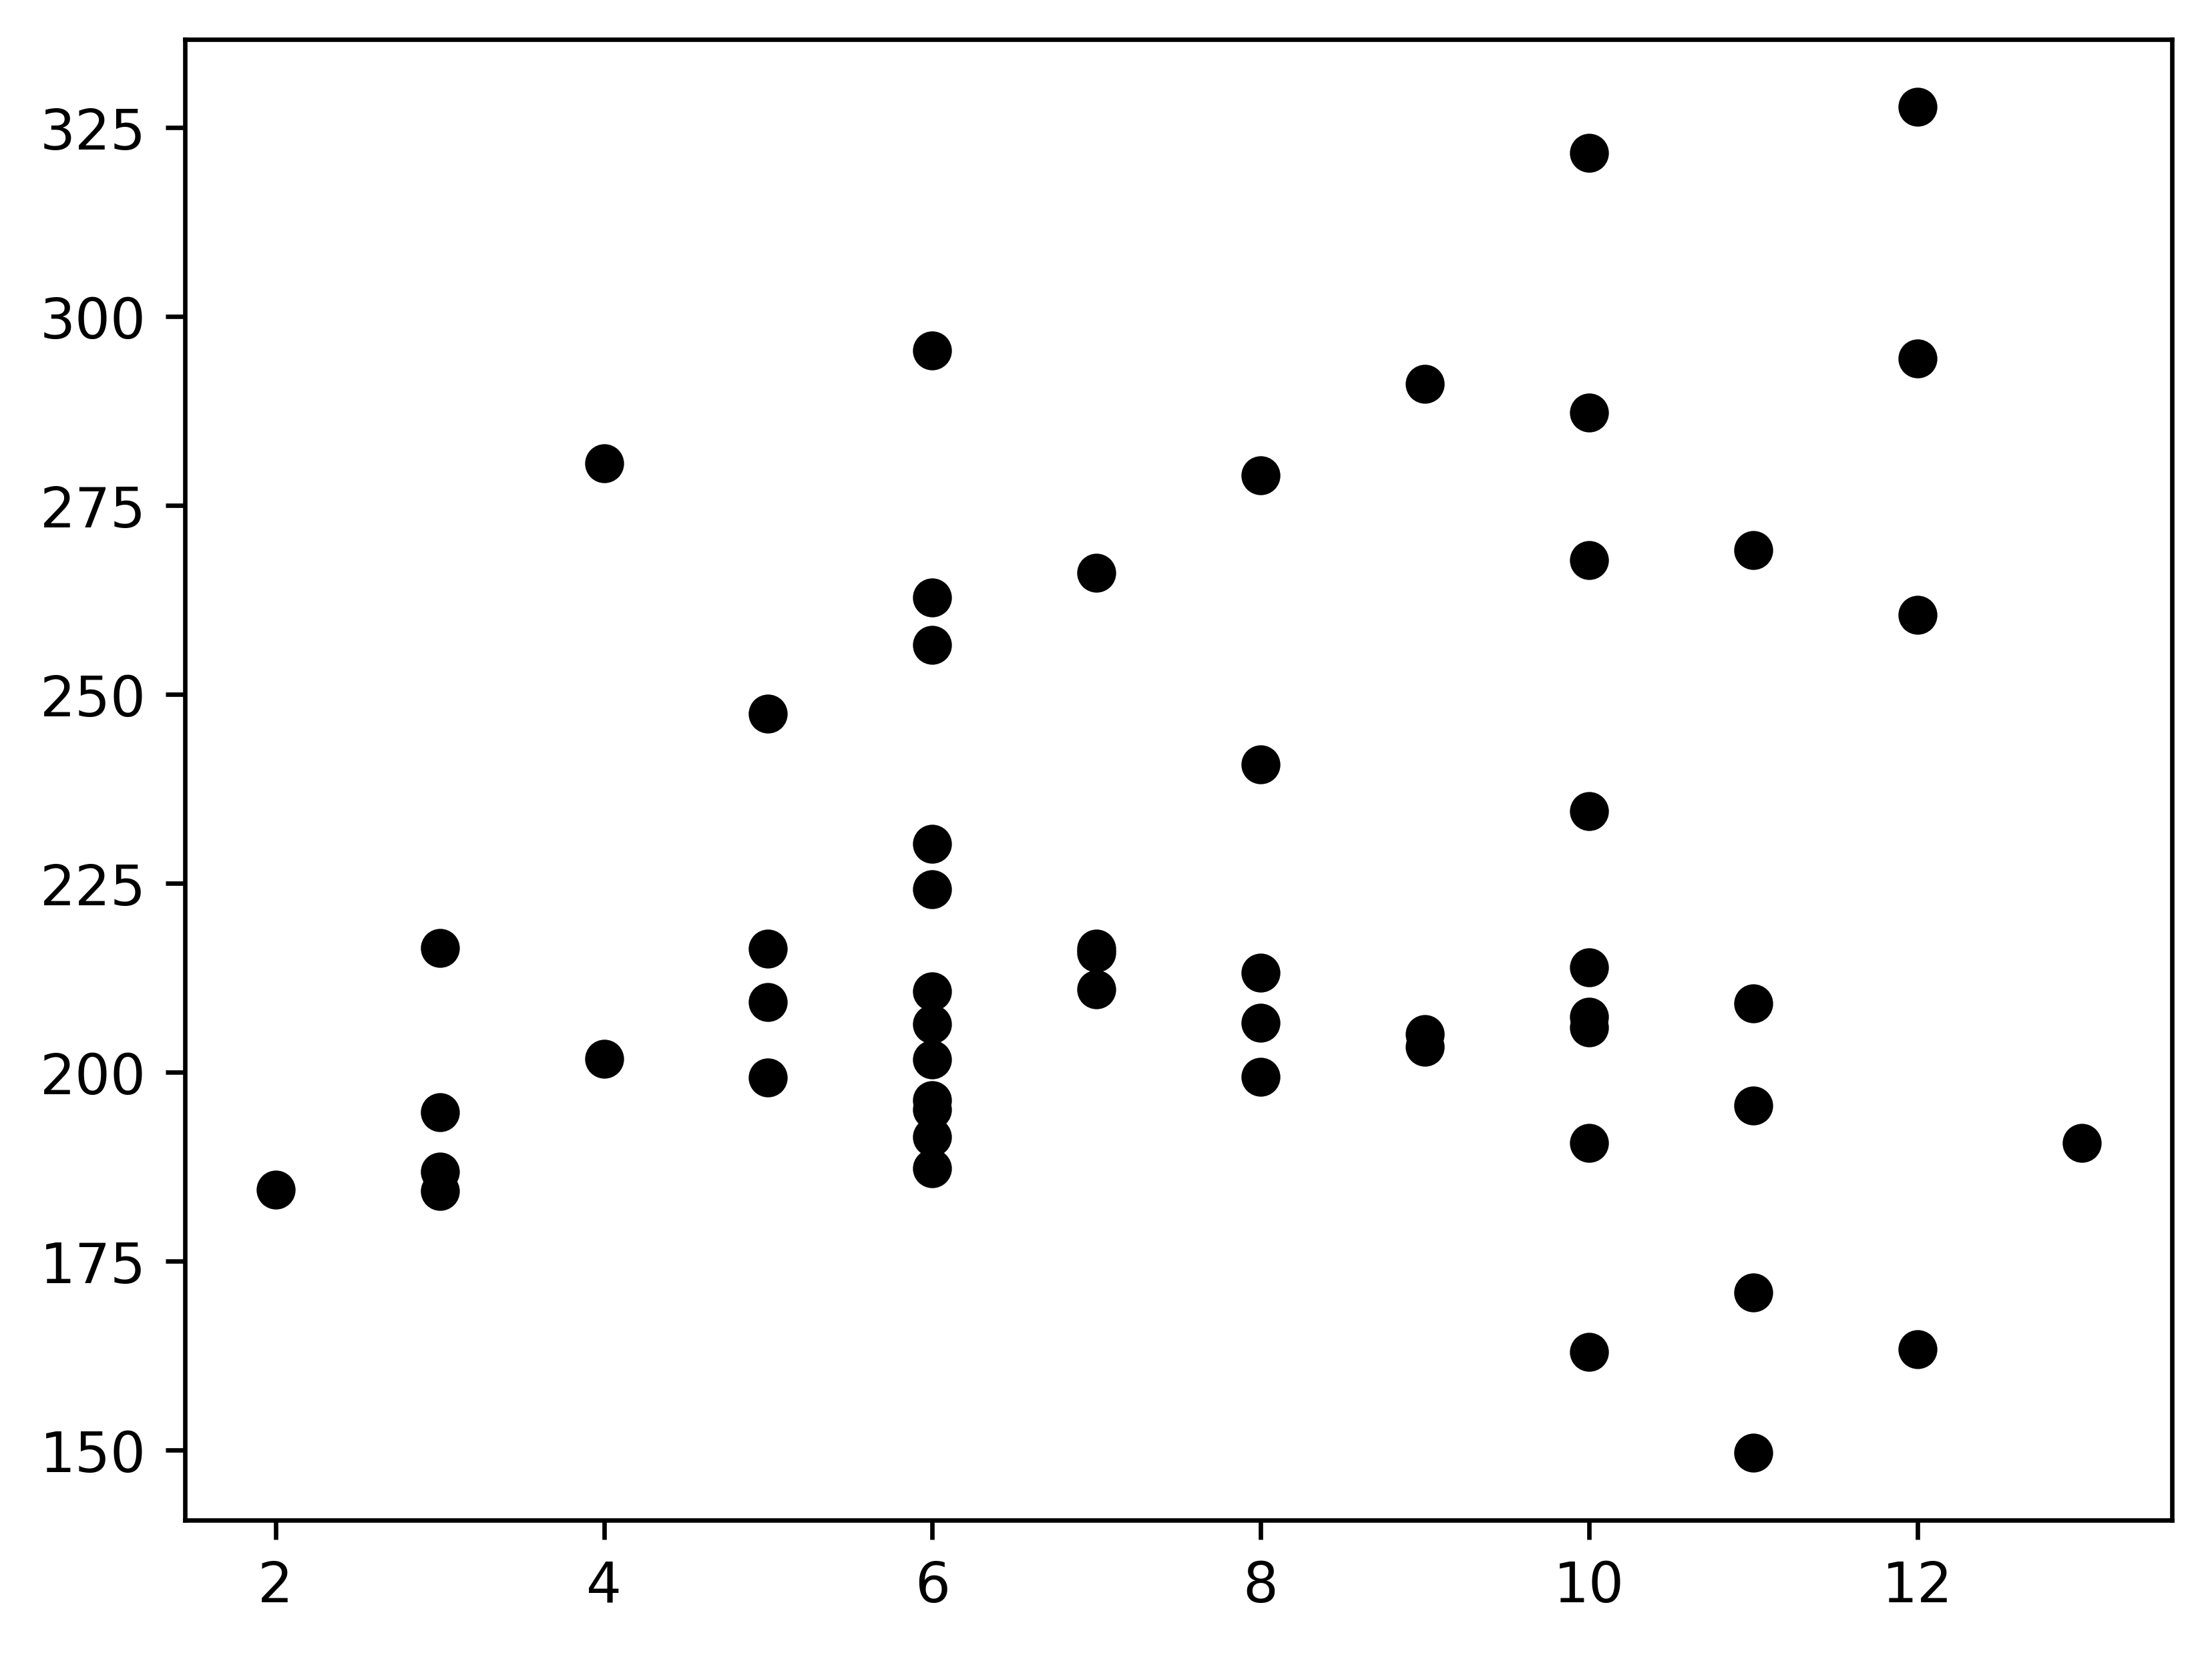

In [6]:
import matplotlib.pyplot as plt

plt.scatter(df_ncaa.Wins, df_ncaa.Points, color="black")

In [7]:
df_ncaa.head()

Team  Rank    Ave  Points  Wins
0     Alabama   1.0  94.99  327.76  12.0
1  Ohio State   2.0  94.98  321.68  10.0
2         LSU   3.0  92.75  295.47   6.0
3     Georgia   4.0  93.49  294.42  12.0
4     Clemson   5.0  94.01  291.06   9.0

## Correlation between columns

In [8]:
df_ncaa.corr()

Rank   Ave  Points  Wins
Rank    1.00 -0.87   -0.92 -0.01
Ave    -0.87  1.00    0.96  0.14
Points -0.92  0.96    1.00  0.16
Wins   -0.01  0.14    0.16  1.00

In [9]:
df_ncaa_slim = df_ncaa.drop(['Rank','Ave'],axis=1)

In [10]:
df_ncaa_slim.head()

Team  Points  Wins
0     Alabama  327.76  12.0
1  Ohio State  321.68  10.0
2         LSU  295.47   6.0
3     Georgia  294.42  12.0
4     Clemson  291.06   9.0

[]

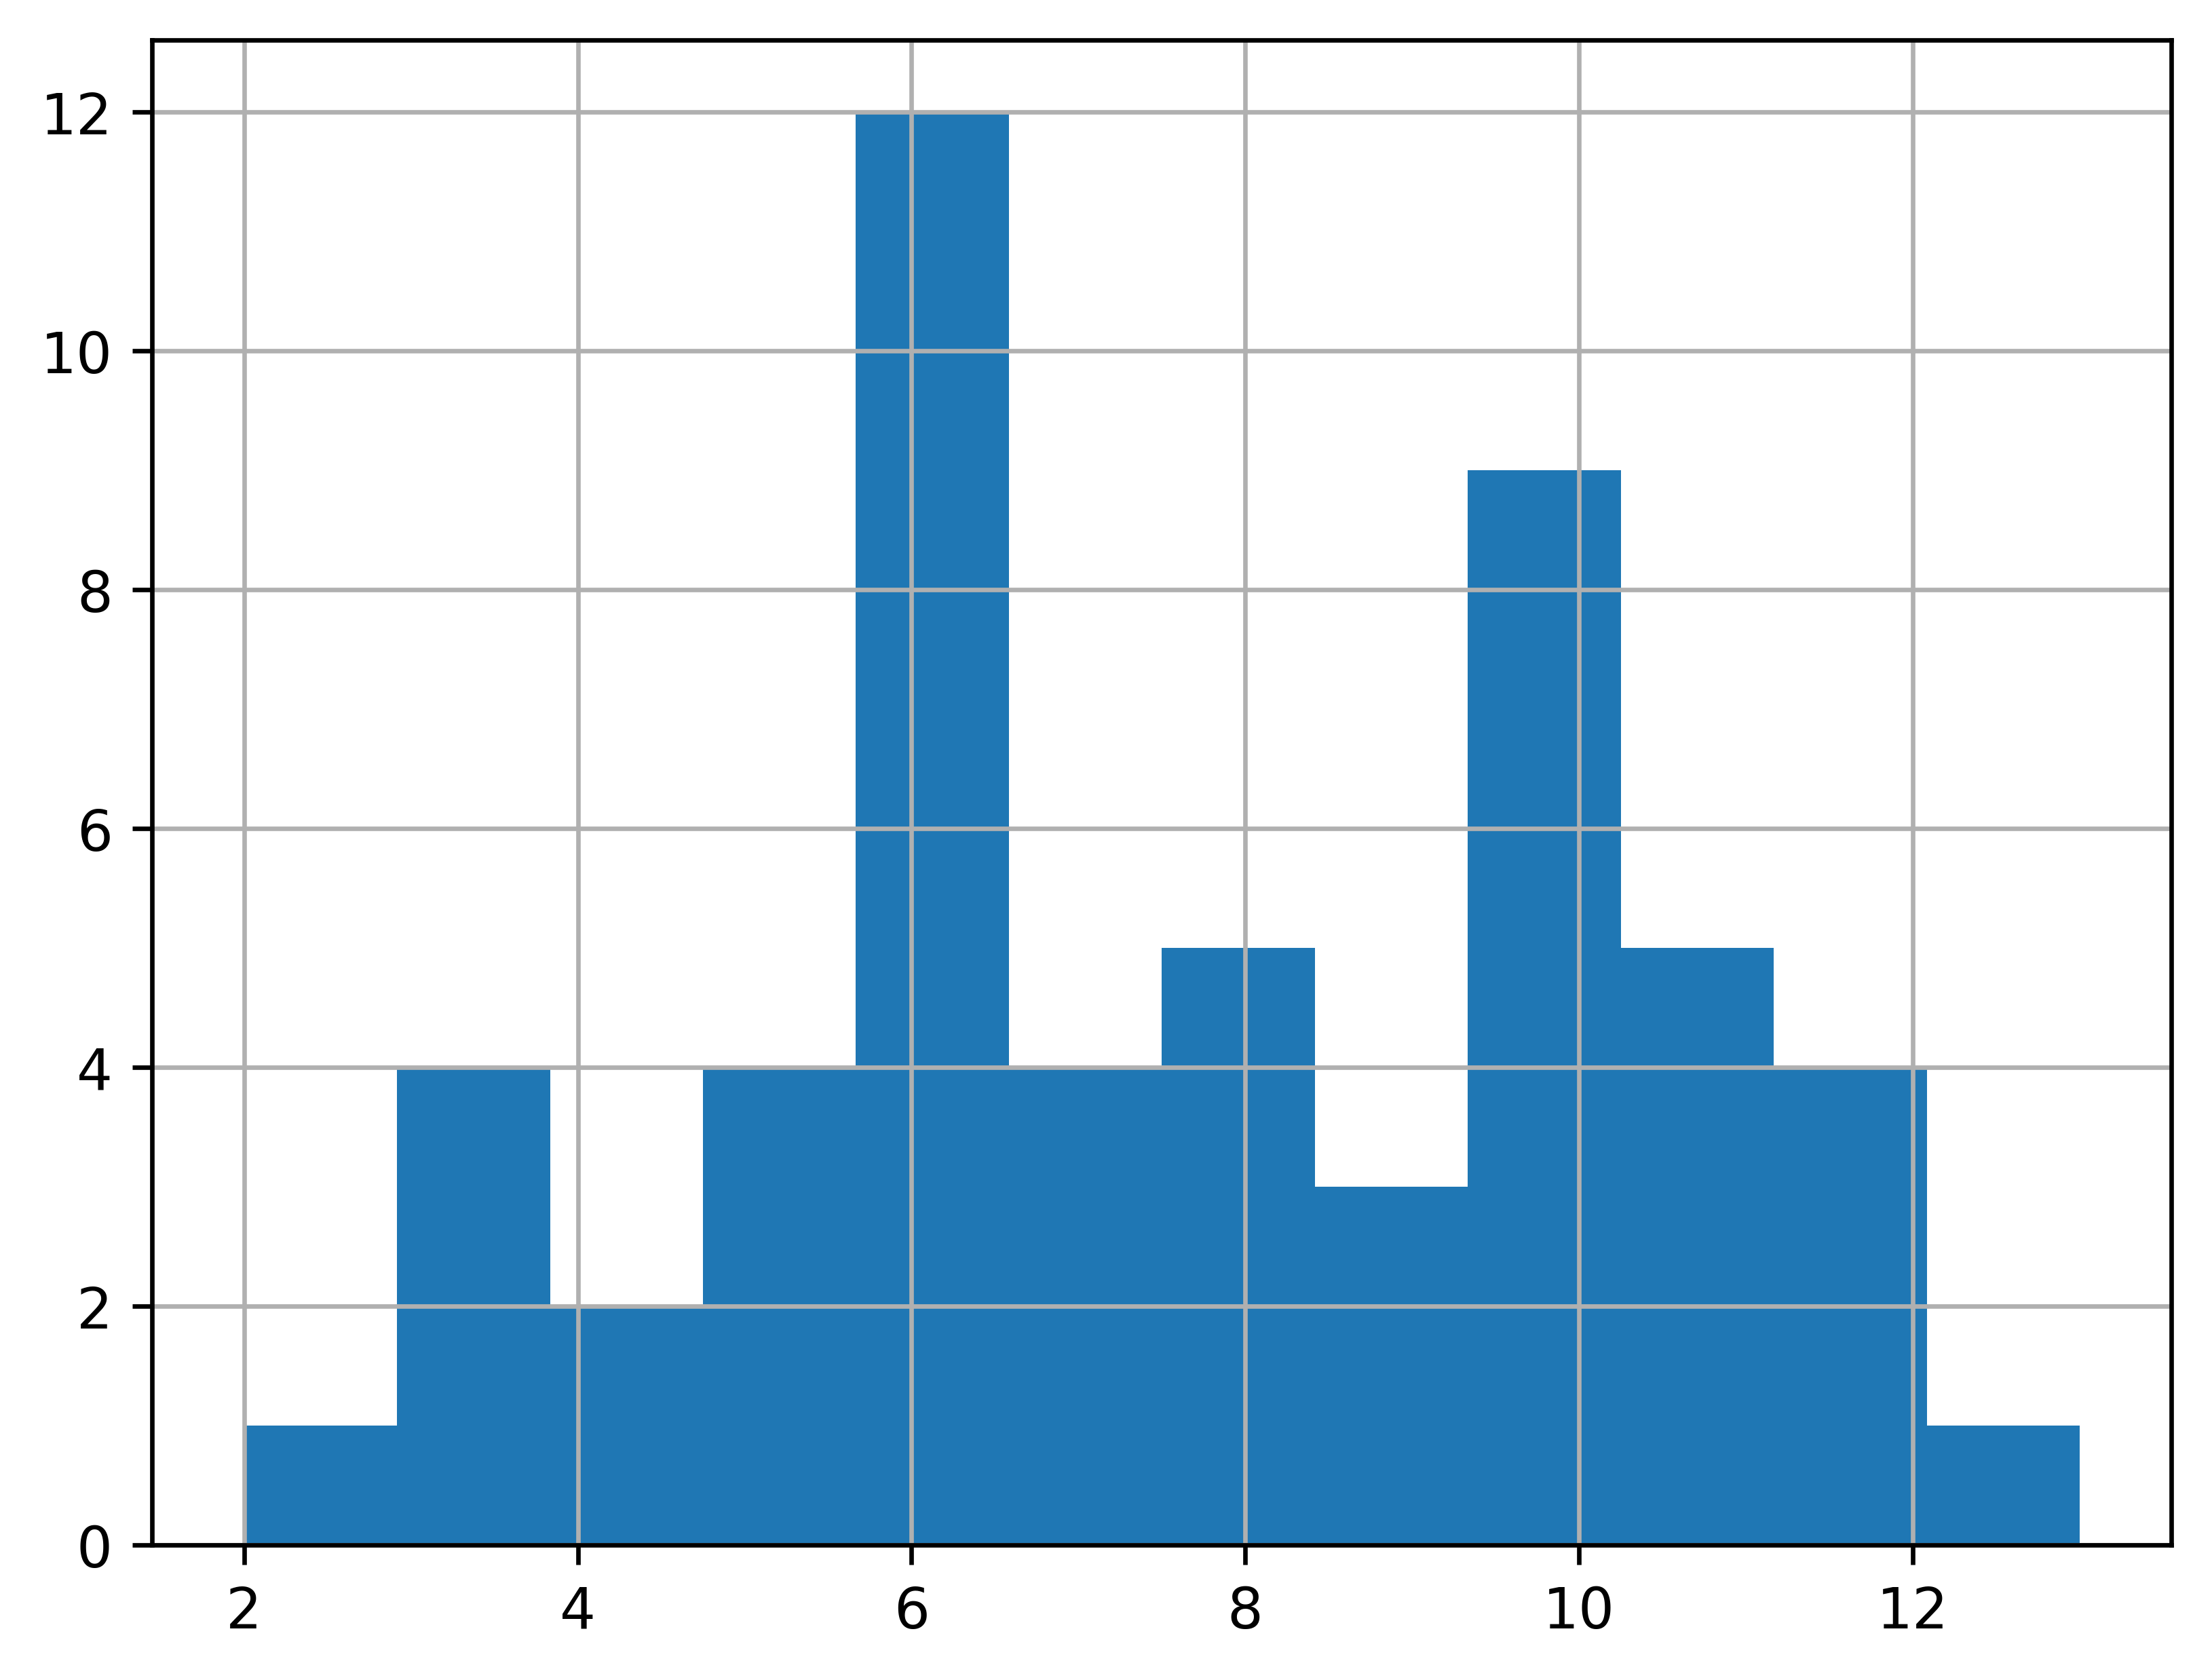

In [11]:
hs = df_ncaa_slim.Wins.hist(bins = 12)
hs.plot()

## Finding and correcting incorrect data entry

In [12]:
df_ncaa_error = pd.read_csv('ncaa_data_full_error.csv')
df_conf = df_ncaa_error.groupby(['Conference'])

df_conf.first()

# df_conf.get_group('SEC')
# df.groupby(['Animal']).mean()

Team  Rank    Ave  Points  Wins
Conference                                         
ACC              Clemson     5  94.01  291.06     9
AMERICAN      Cincinnati    45  85.24  190.66    13
BIG10         Ohio State     2  94.98  321.68    10
BIG12           Oklahoma    10  93.18  267.80    10
IND           Notre Dame     9  89.68  269.05    11
MWEST       San Diego St    62  83.10  170.80    11
PAC12             Oregon     6  92.36  287.29    10
SEC              Alabama     1  94.99  327.76    12
SEV            Texas A&M     8  91.70  279.02     8
Sun Belt    LA Lafayette    69  83.53  163.32    12

In [13]:
df_conf_sort = df_conf.mean().sort_values(by=['Ave'], ascending = False)['Ave']
df_conf_sort

Conference
SEV         91.70
SEC         89.03
PAC12       88.65
BIG12       88.52
BIG10       88.24
ACC         87.71
IND         86.77
AMERICAN    84.88
Sun Belt    83.53
MWEST       83.10
Name: Ave, dtype: float64

In [14]:
df_ncaa_error.Conference.value_counts()

SEC         12
BIG10       11
ACC         11
PAC12        7
BIG12        5
AMERICAN     3
IND          2
SEV          1
MWEST        1
Sun Belt     1
Name: Conference, dtype: int64

In [15]:
mask = df_ncaa_error['Conference'] == 'SEV'
type(df_ncaa_error[mask])

pandas.core.frame.DataFrame

In [16]:
df_ncaa_error
df_ncaa_error.loc[mask, 'Conference']

7    SEV
Name: Conference, dtype: object

In [17]:
# df_ncaa_error[mask].Conference = 'SEC'

df_ncaa_error.loc[mask, 'Conference']= 'SEC'
type(df_ncaa_error.loc[7])

pandas.core.series.Series

## Removing NaN

In [18]:
df_ncaa.isnull().sum()

Team      2
Rank      2
Ave       2
Points    2
Wins      2
dtype: int64

In [19]:
df = df_ncaa.iloc[:,0:-1]
df[df.isna().any(axis=1)]

Team  Rank  Ave  Points
28  NaN   NaN  NaN     NaN
46  NaN   NaN  NaN     NaN

In [20]:
ncaa_clean = df_ncaa.dropna(how='all')
ncaa_clean.isnull().sum()

Team      0
Rank      0
Ave       0
Points    0
Wins      0
dtype: int64

## One Hot encoding

In [21]:
import pandas as pd

df = pd.DataFrame({
    'name': ['ball_1', 'ball_2','ball_3', 'ball_4'],
    'color': ['red', 'blue', 'green', 'blue']
    })
df

name  color
0  ball_1    red
1  ball_2   blue
2  ball_3  green
3  ball_4   blue

In [22]:
one_hot_df = pd.get_dummies(df, prefix=['color'], columns = ['color'])
one_hot_df

name  color_blue  color_green  color_red
0  ball_1           0            0          1
1  ball_2           1            0          0
2  ball_3           0            1          0
3  ball_4           1            0          0

## Cali Data

## Original Data

In [23]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split 


training_data, target_value = fetch_california_housing(return_X_y=True, as_frame=True)
X_train, X_test, y_train, y_test = train_test_split(training_data, target_value, test_size = 0.2, random_state=33) 

See Chapter 2 notebook http://localhost:8889/notebooks/Dev/data-science-with-anaconda/ch_02/CH_2.ipynb

In [24]:
from sklearn.linear_model import LinearRegression

linear_regressor = LinearRegression() 

y_predict = linear_regressor.fit(X_train,y_train).predict(X_test)

<AxesSubplot:>

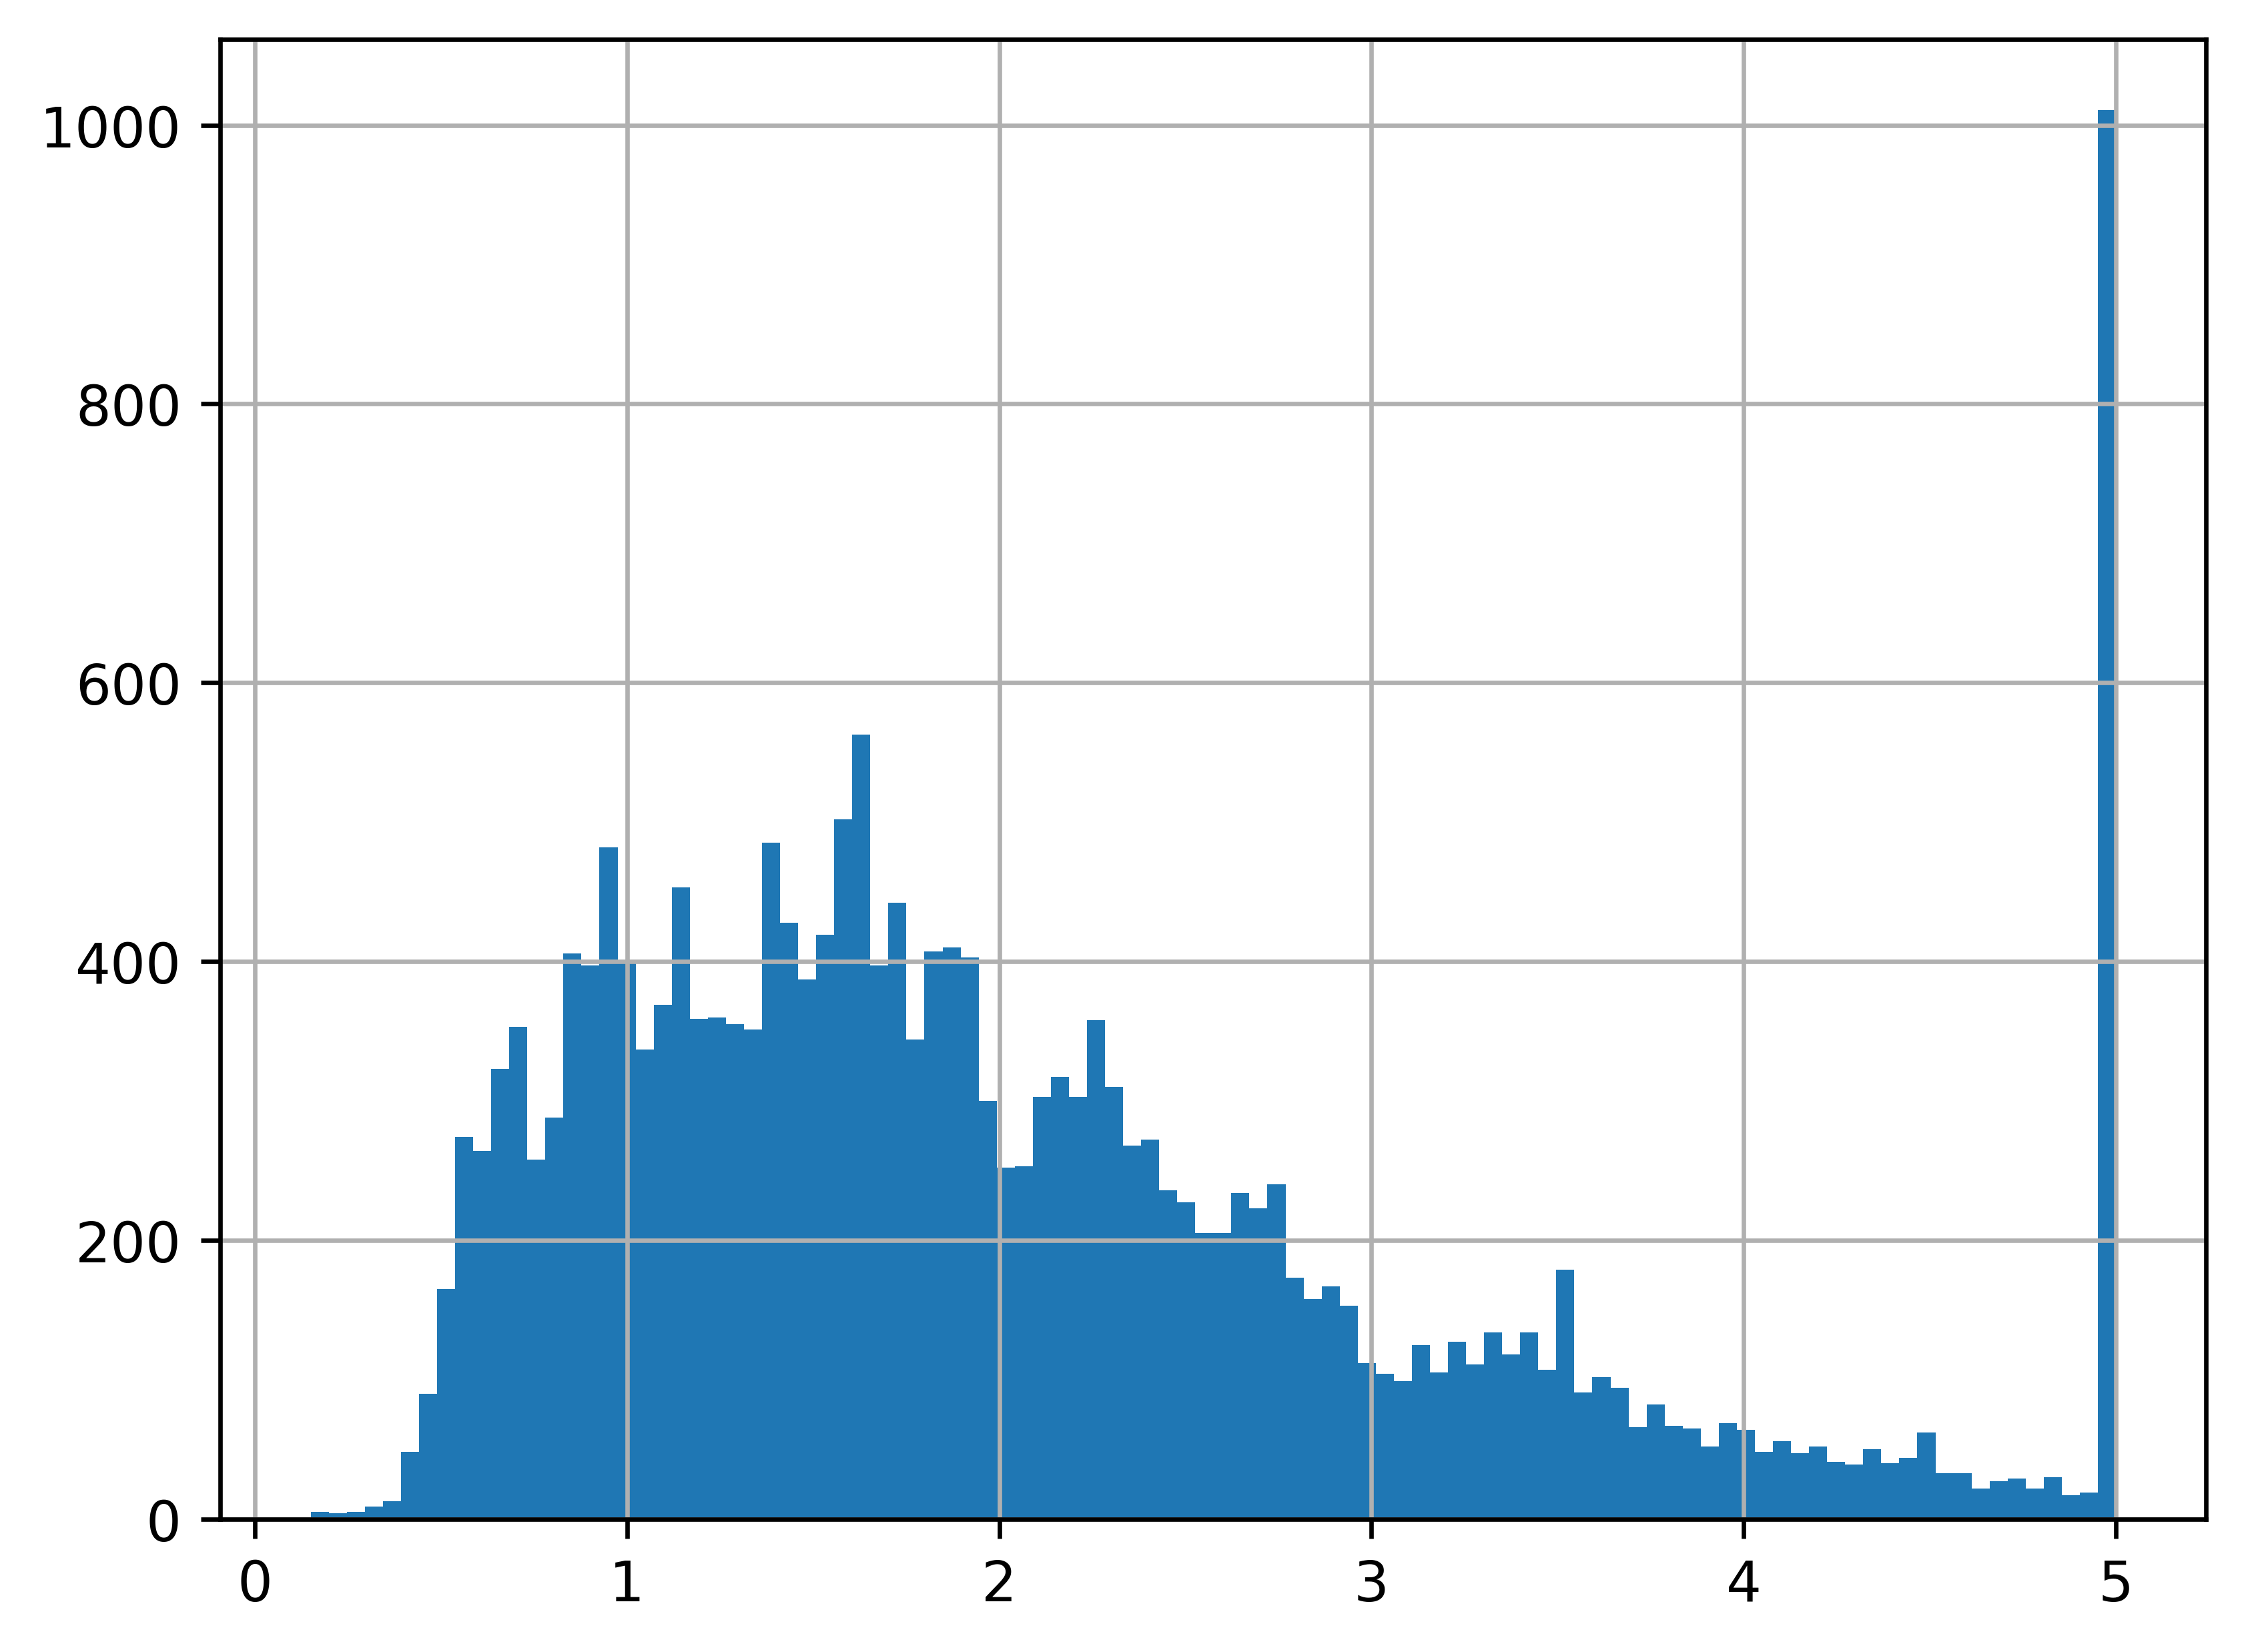

In [25]:
target_value.hist(bins = 100)

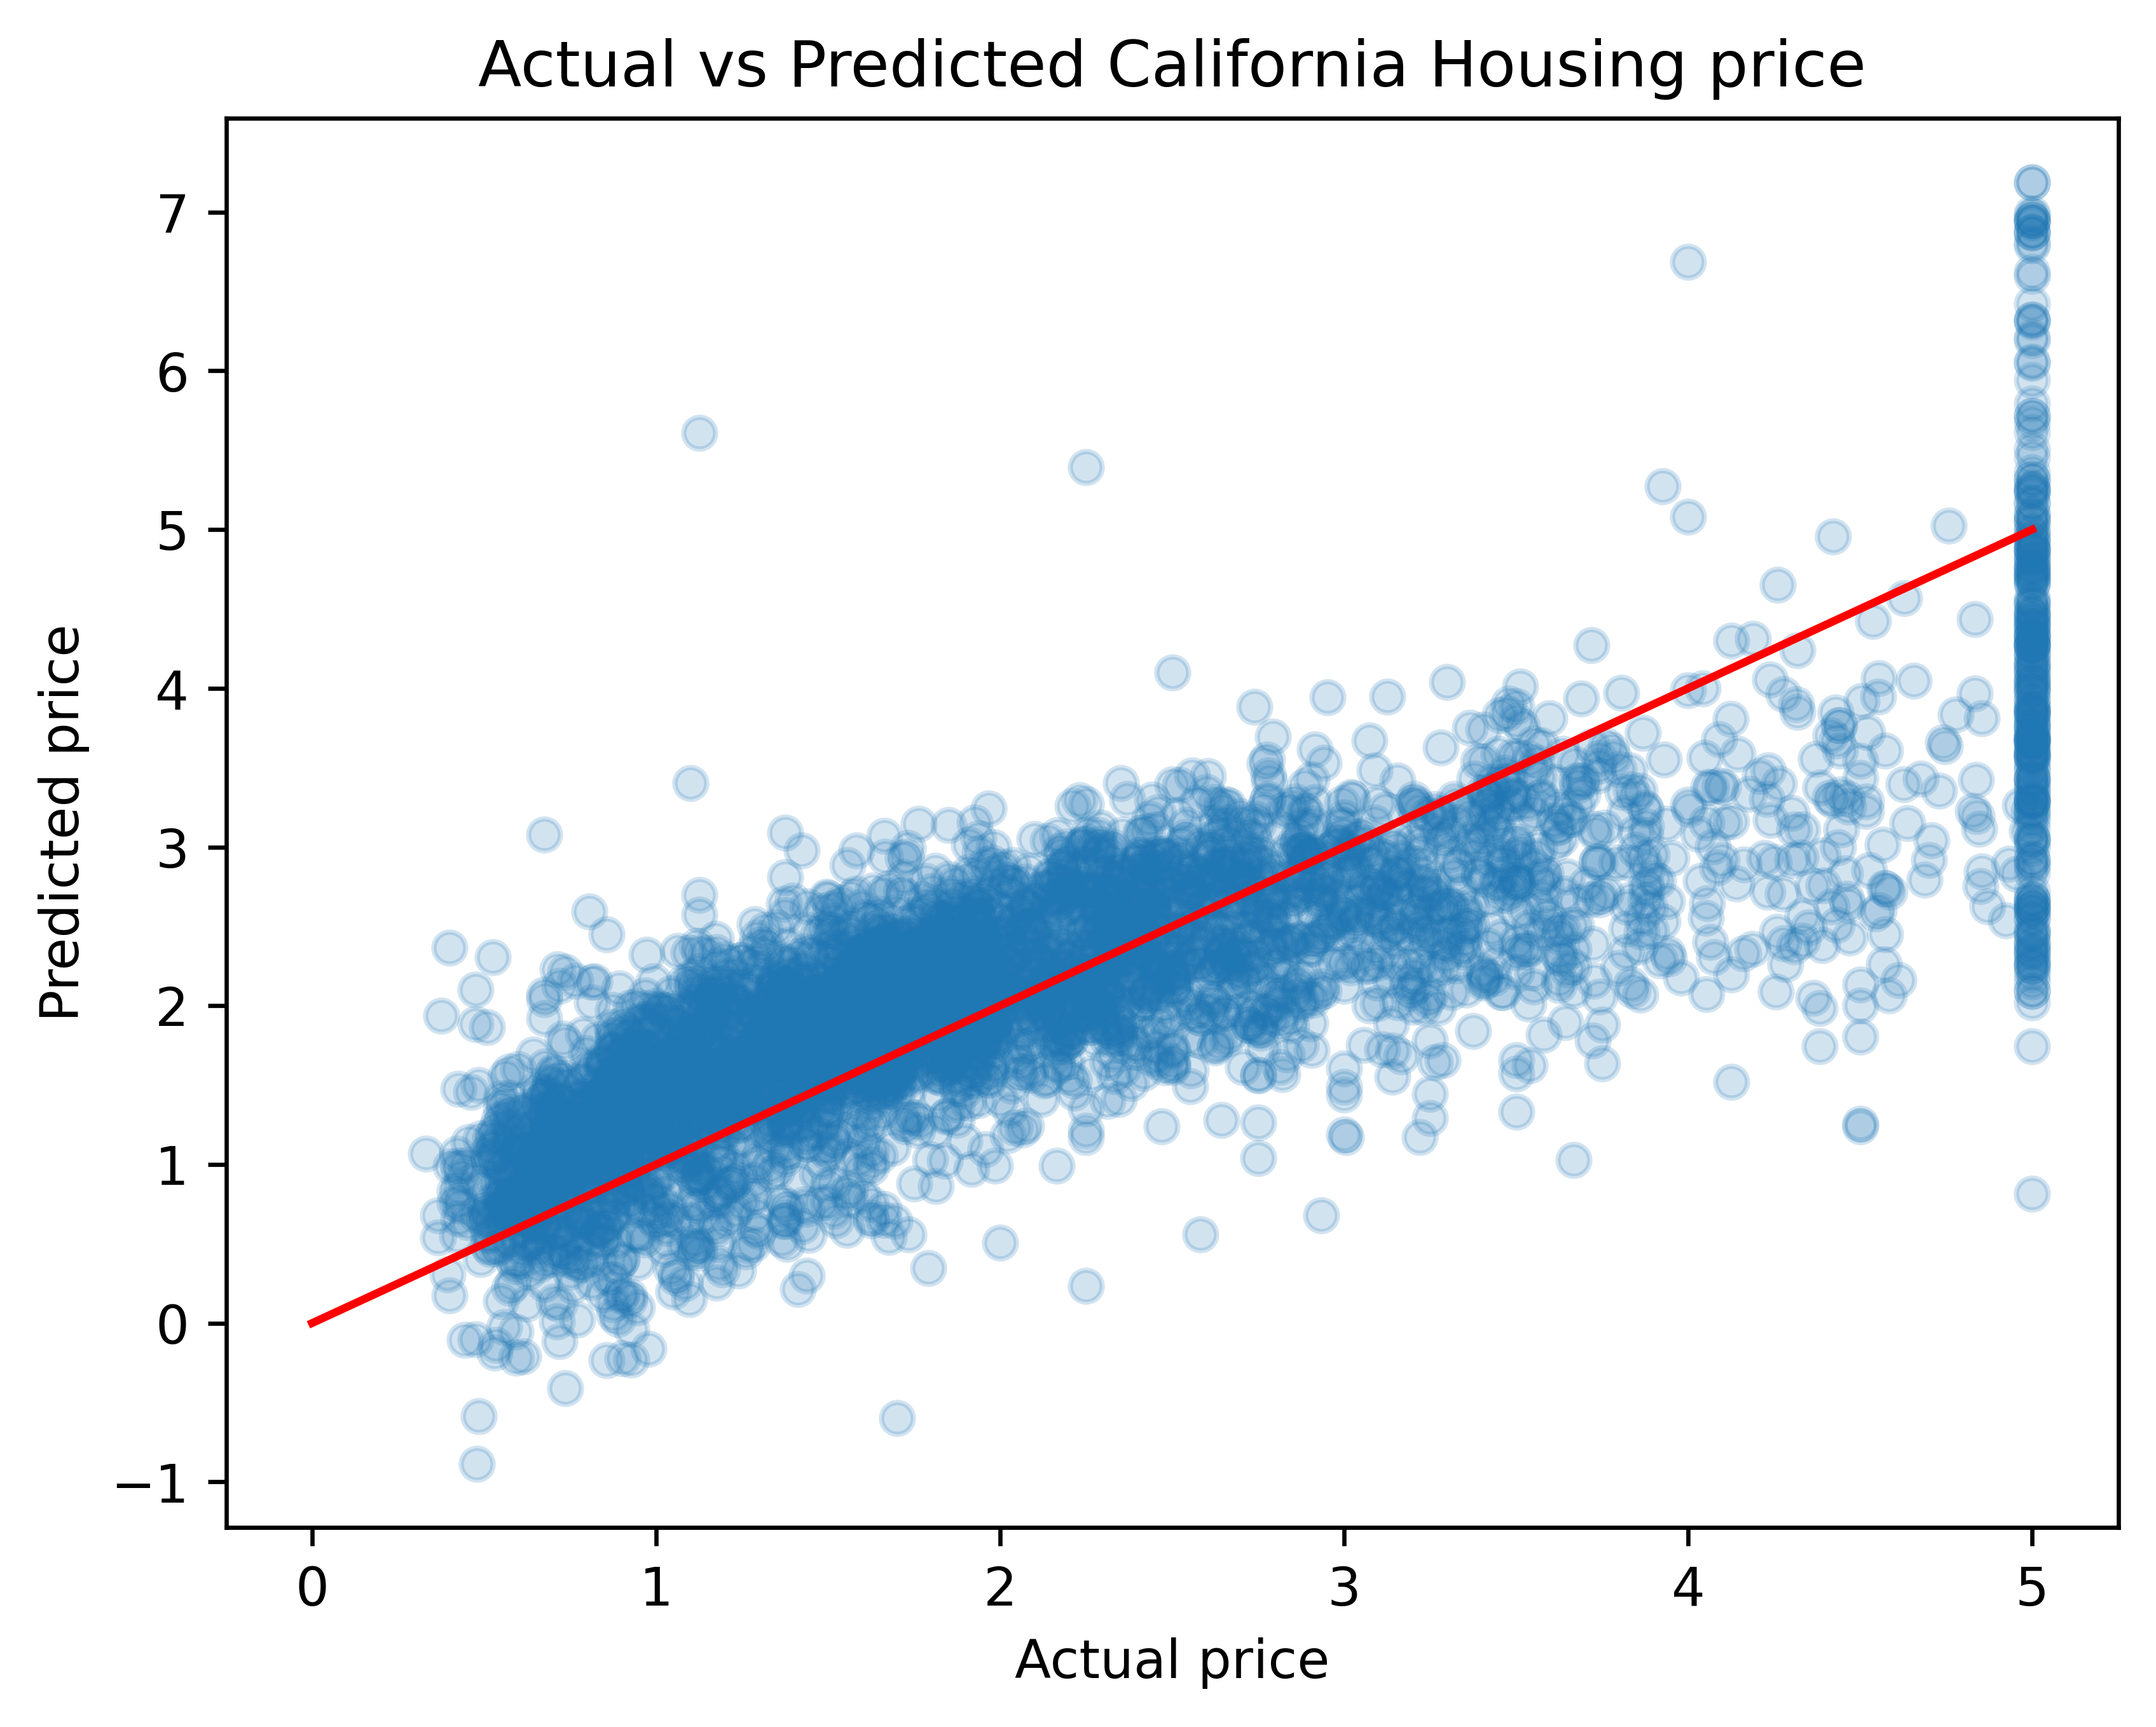

In [26]:
import matplotlib.pyplot as plt

plt.title('Actual vs Predicted California Housing price') 
plt.xlabel('Actual price') 
plt.ylabel('Predicted price') 
plt.scatter(y_test,y_predict,alpha=.2) 
plt.plot([0, 5], [0, 5],"r-") 

plt.show()

<AxesSubplot:>

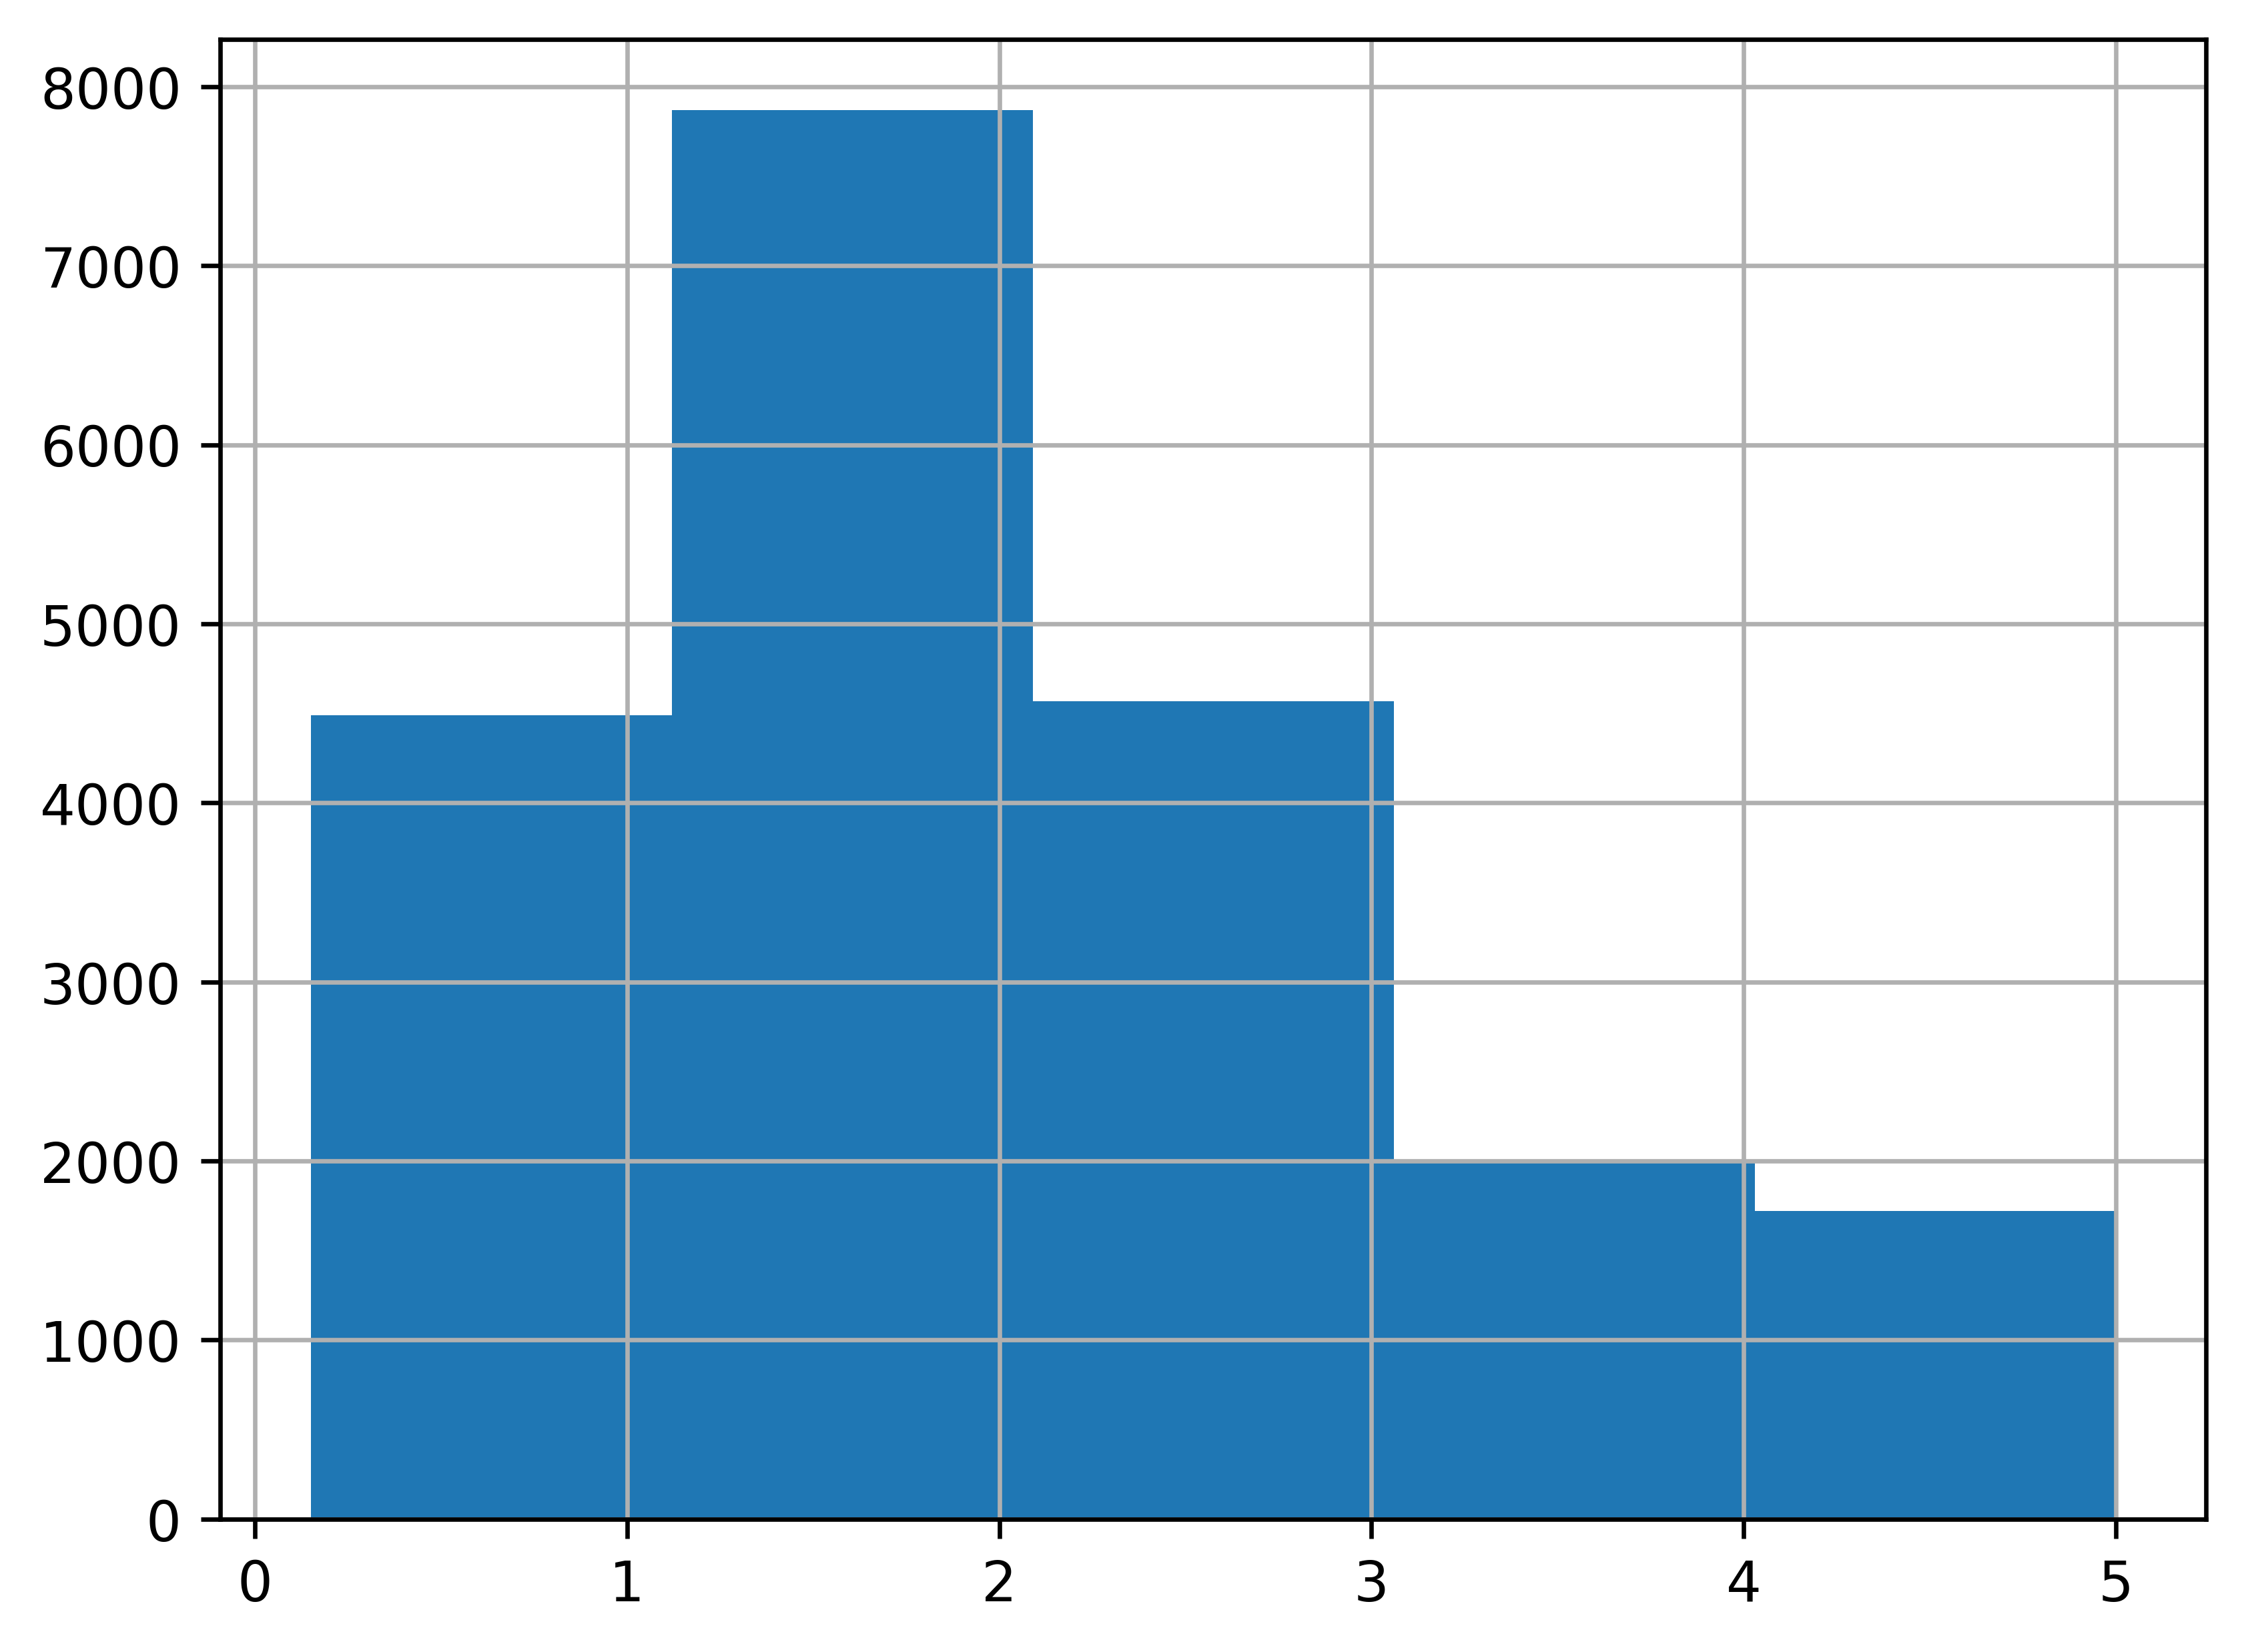

In [27]:
target_value.hist(bins = 5)

In [28]:
from sklearn.metrics import r2_score

r2_score(y_test, y_predict)

0.6255952434969314

## Removing Capped Values

In [29]:
training_data, target_value = fetch_california_housing(return_X_y=True, as_frame=True)
training_data = training_data.drop(axis = 1, labels=['Latitude','Longitude'])
training_data

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup
0        8.33      41.0      6.98       1.02       322.0      2.56
1        8.30      21.0      6.24       0.97      2401.0      2.11
2        7.26      52.0      8.29       1.07       496.0      2.80
3        5.64      52.0      5.82       1.07       558.0      2.55
4        3.85      52.0      6.28       1.08       565.0      2.18
...       ...       ...       ...        ...         ...       ...
20635    1.56      25.0      5.05       1.13       845.0      2.56
20636    2.56      18.0      6.11       1.32       356.0      3.12
20637    1.70      17.0      5.21       1.12      1007.0      2.33
20638    1.87      18.0      5.33       1.17       741.0      2.12
20639    2.39      16.0      5.25       1.16      1387.0      2.62

[20640 rows x 6 columns]

In [30]:
target_value.describe()

count    20640.00
mean         2.07
std          1.15
min          0.15
25%          1.20
50%          1.80
75%          2.65
max          5.00
Name: MedHouseVal, dtype: float64

Original Prediction
R2 is: 0.533257512867769
MSE is: 0.6122218466726023


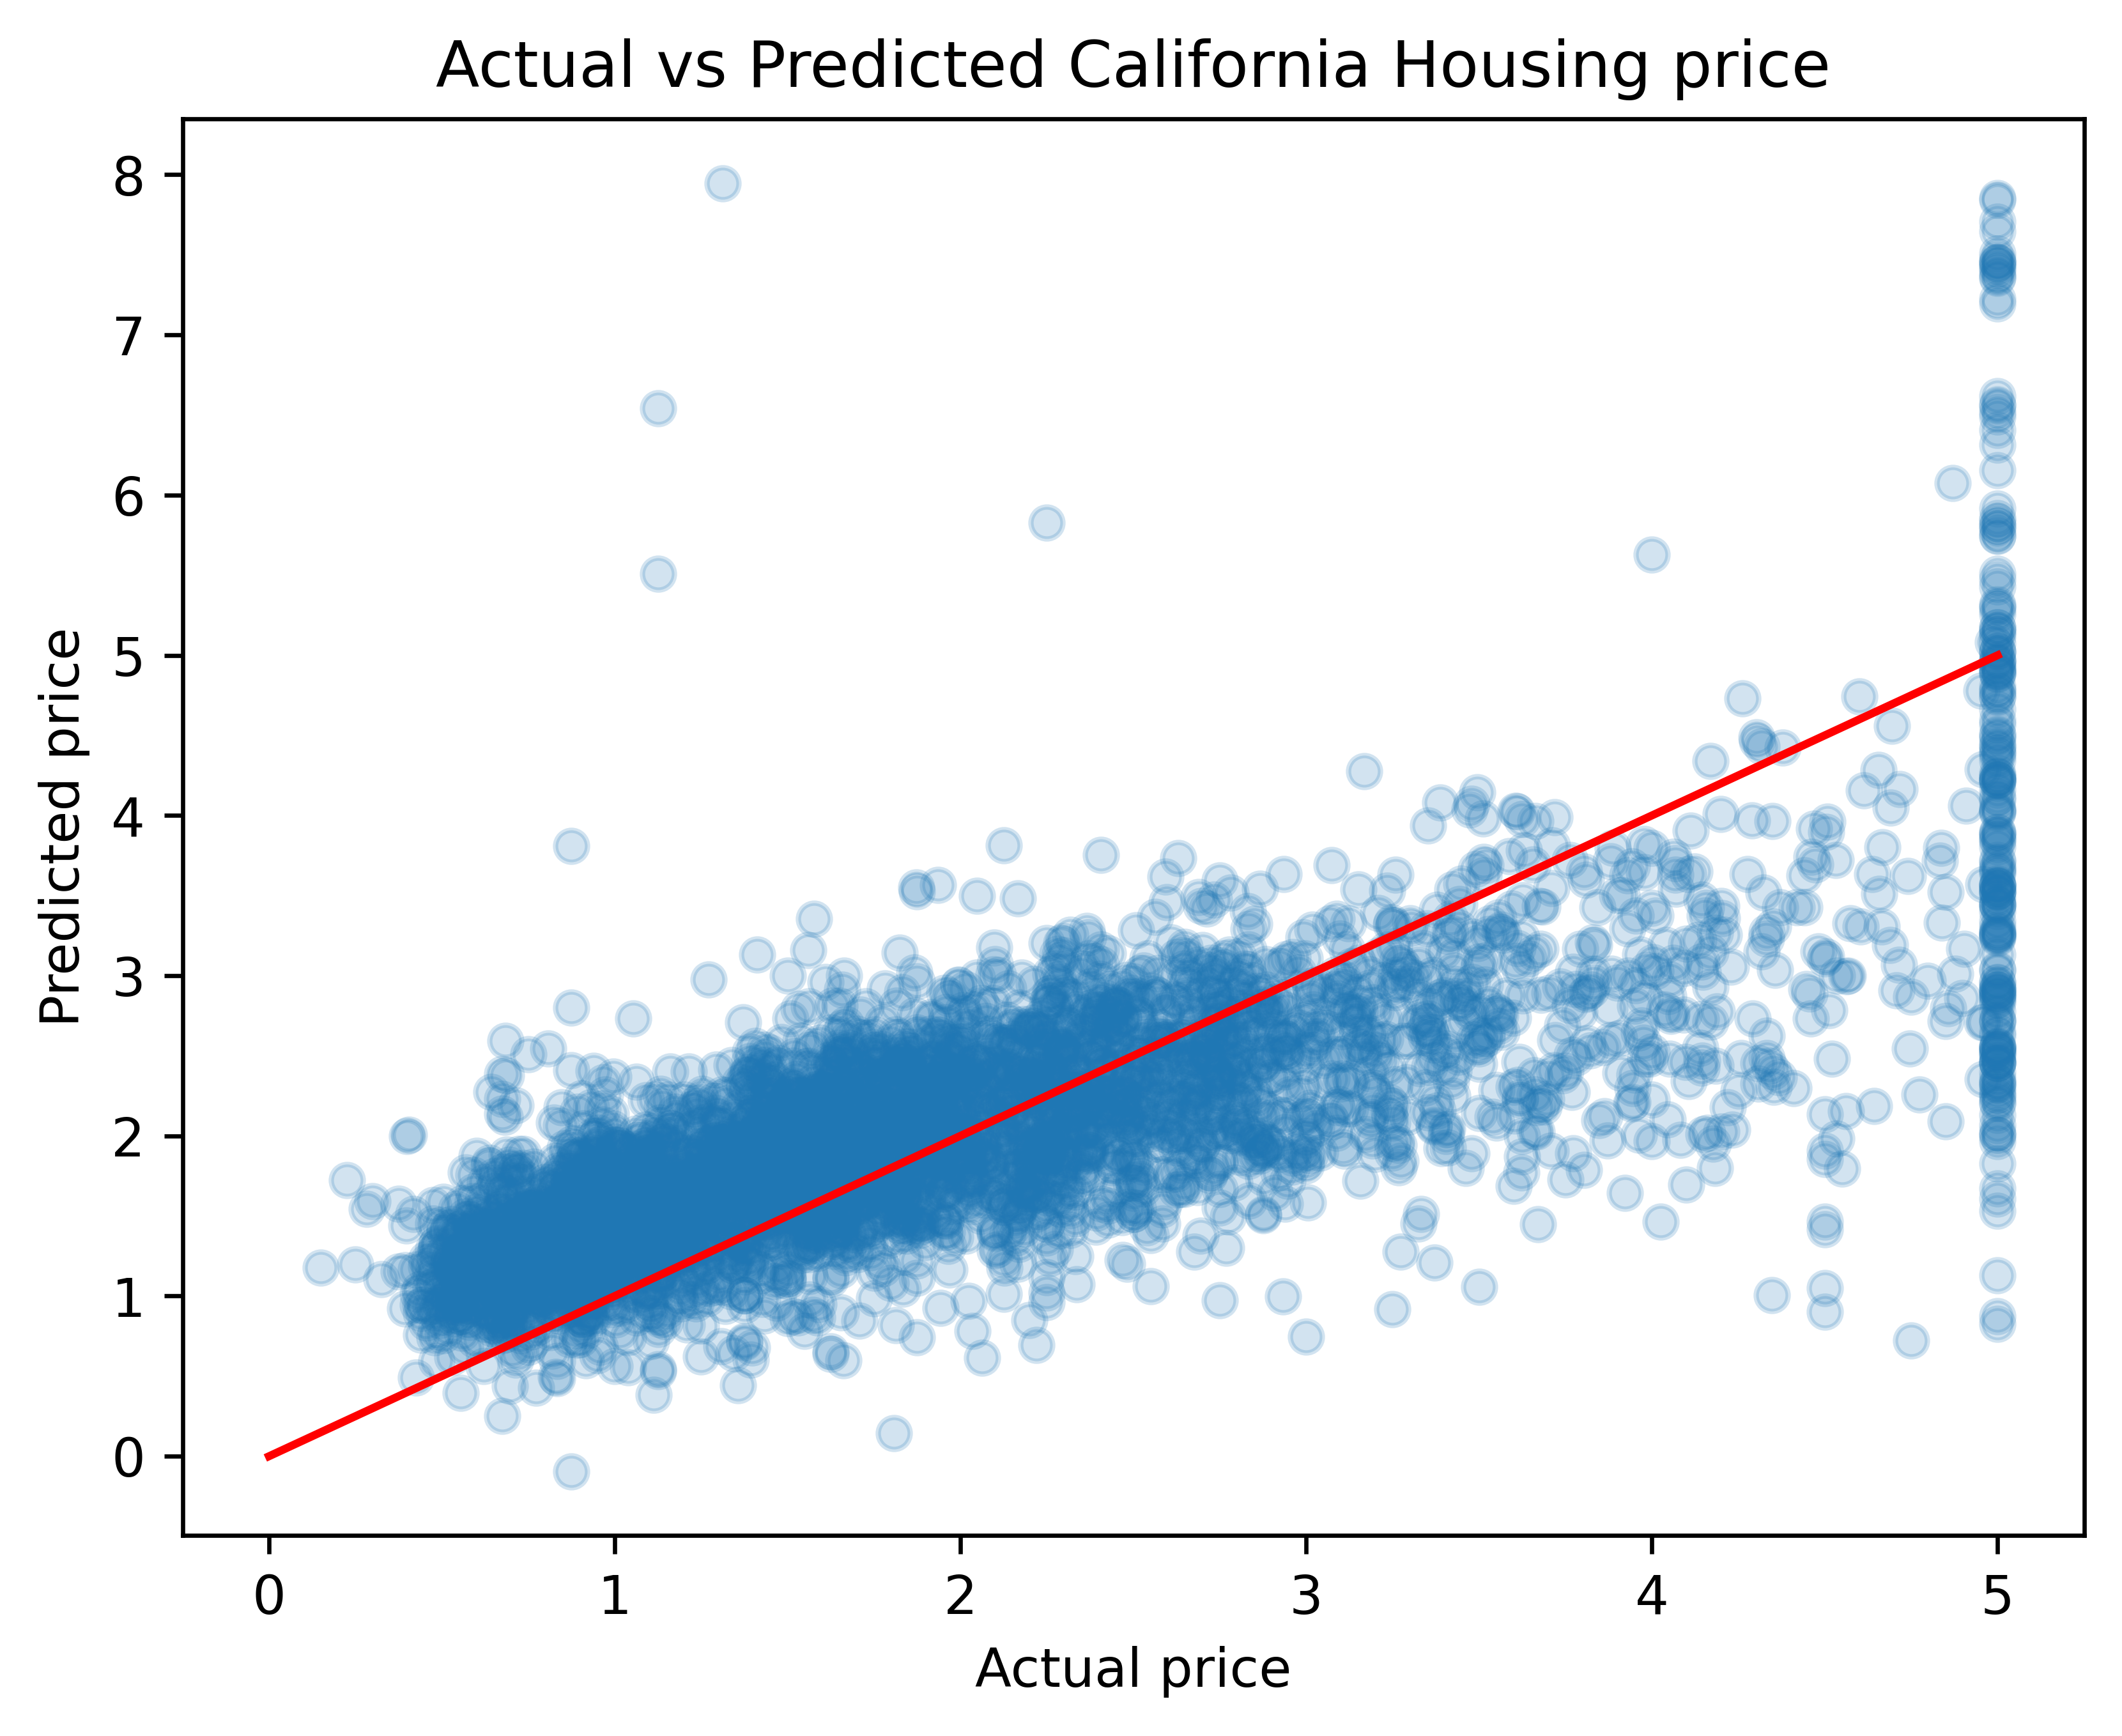

In [31]:
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(training_data, target_value, test_size = 0.2, random_state=1) 
linear_regressor = LinearRegression() 
y_predict = linear_regressor.fit(X_train,y_train).predict(X_test)
print(f"Original Prediction")
print(f"R2 is: {r2_score(y_test, y_predict)}")
print(f"MSE is: {mean_squared_error(y_test, y_predict)}")

import matplotlib.pyplot as plt

plt.title('Actual vs Predicted California Housing price') 
plt.xlabel('Actual price') 
plt.ylabel('Predicted price') 
plt.scatter(y_test,y_predict,alpha=.2)
plt.plot([0, 5], [0, 5],"r-") 

plt.show()

In [32]:
target_cond = target_value < 5.0
target_cond

0        True
1        True
2        True
3        True
4        True
         ... 
20635    True
20636    True
20637    True
20638    True
20639    True
Name: MedHouseVal, Length: 20640, dtype: bool

In [33]:
filtered_training_data = training_data[target_cond]
filtered_training_data

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup
0        8.33      41.0      6.98       1.02       322.0      2.56
1        8.30      21.0      6.24       0.97      2401.0      2.11
2        7.26      52.0      8.29       1.07       496.0      2.80
3        5.64      52.0      5.82       1.07       558.0      2.55
4        3.85      52.0      6.28       1.08       565.0      2.18
...       ...       ...       ...        ...         ...       ...
20635    1.56      25.0      5.05       1.13       845.0      2.56
20636    2.56      18.0      6.11       1.32       356.0      3.12
20637    1.70      17.0      5.21       1.12      1007.0      2.33
20638    1.87      18.0      5.33       1.17       741.0      2.12
20639    2.39      16.0      5.25       1.16      1387.0      2.62

[19648 rows x 6 columns]

In [34]:
filtered_training_data[target_cond]

C:\Users\gpower\AppData\Local\Temp\ipykernel_3996\2169158191.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_training_data[target_cond]


MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup
0        8.33      41.0      6.98       1.02       322.0      2.56
1        8.30      21.0      6.24       0.97      2401.0      2.11
2        7.26      52.0      8.29       1.07       496.0      2.80
3        5.64      52.0      5.82       1.07       558.0      2.55
4        3.85      52.0      6.28       1.08       565.0      2.18
...       ...       ...       ...        ...         ...       ...
20635    1.56      25.0      5.05       1.13       845.0      2.56
20636    2.56      18.0      6.11       1.32       356.0      3.12
20637    1.70      17.0      5.21       1.12      1007.0      2.33
20638    1.87      18.0      5.33       1.17       741.0      2.12
20639    2.39      16.0      5.25       1.16      1387.0      2.62

[19648 rows x 6 columns]

<AxesSubplot:title={'center':'Actual vs Predicted California Housing price'}, xlabel='Actual price', ylabel='Predicted price'>

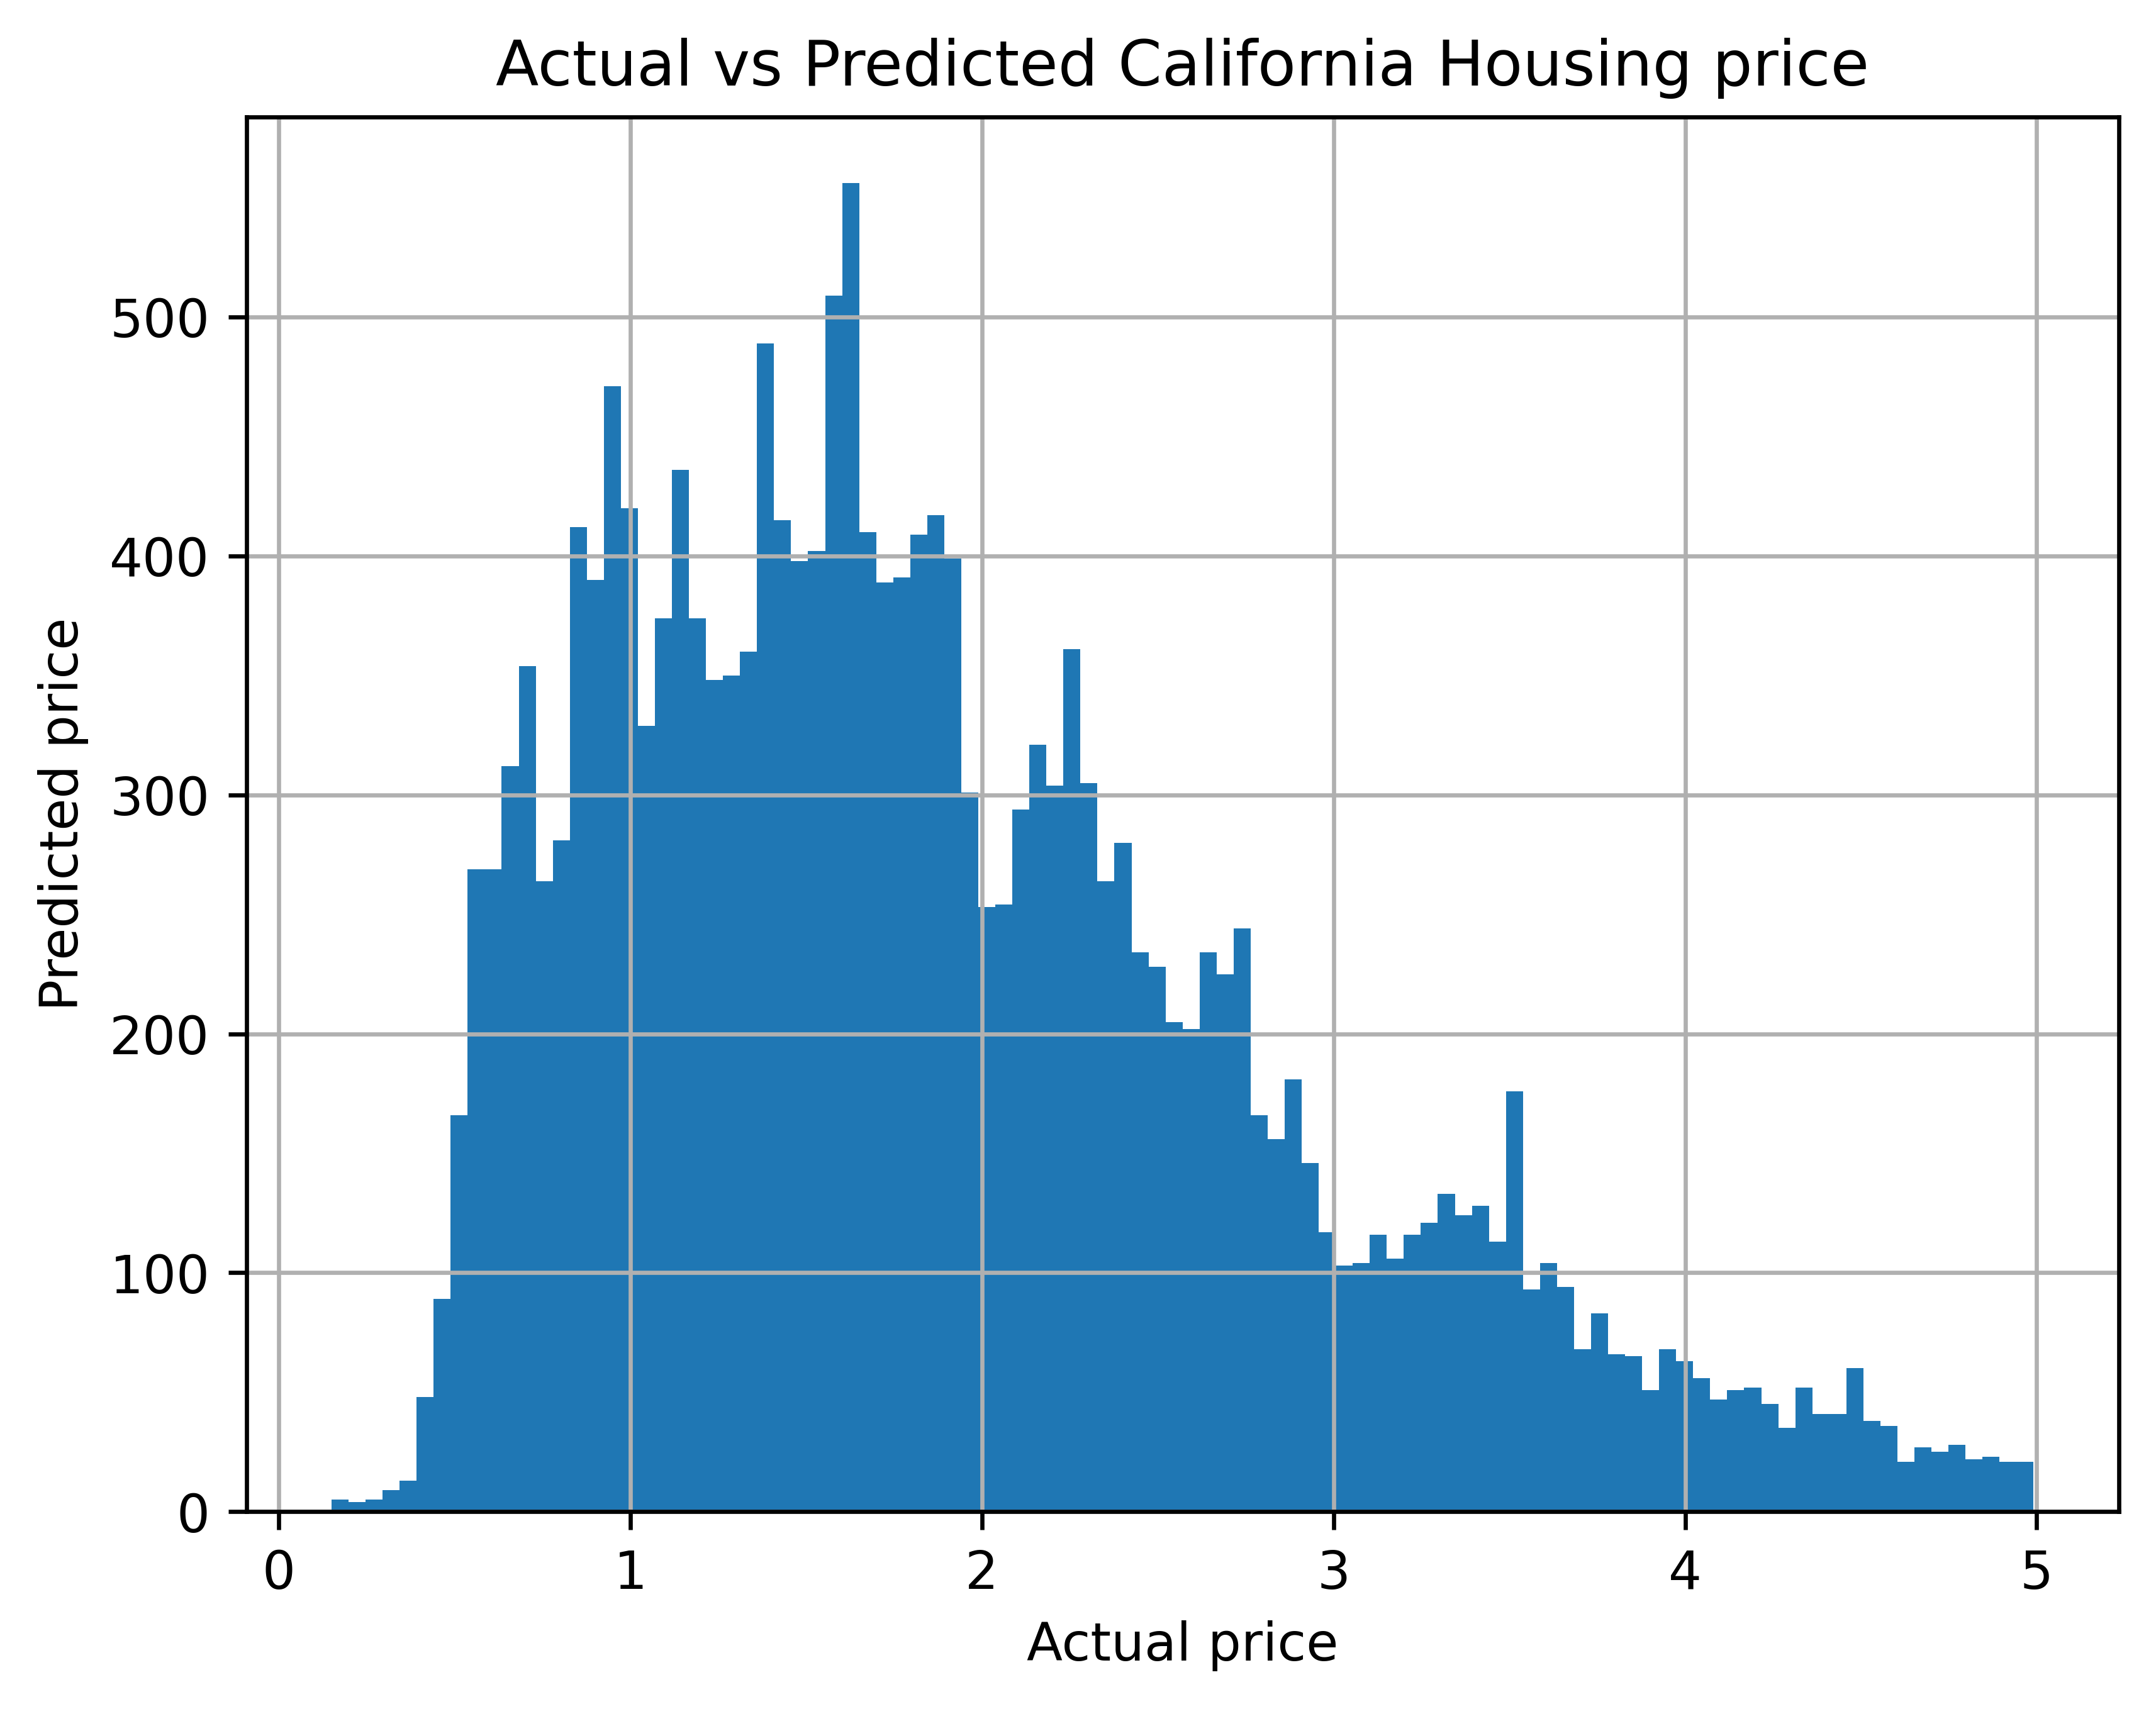

In [35]:
plt.title('Actual vs Predicted California Housing price') 
plt.xlabel('Actual price') 
plt.ylabel('Predicted price') 
target_value[target_cond].hist(bins = 100) 

In [36]:
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(filtered_training_data, target_value[target_cond], test_size = 0.2, random_state=1) 
linear_regressor = LinearRegression() 
y_predict = linear_regressor.fit(X_train,y_train).predict(X_test)
print(f"Filtered Prediction")
print(f"R2 is: {r2_score(y_test, y_predict)}")
print(f"MSE is: {mean_squared_error(y_test, y_predict)}")

Filtered Prediction
R2 is: 0.5159223449106707
MSE is: 0.4582190705946866


In [37]:
from sklearn.metrics import mean_absolute_error 

print(f"MAE is: {mean_absolute_error(y_test, y_predict)}") 

MAE is: 0.5117058406928799


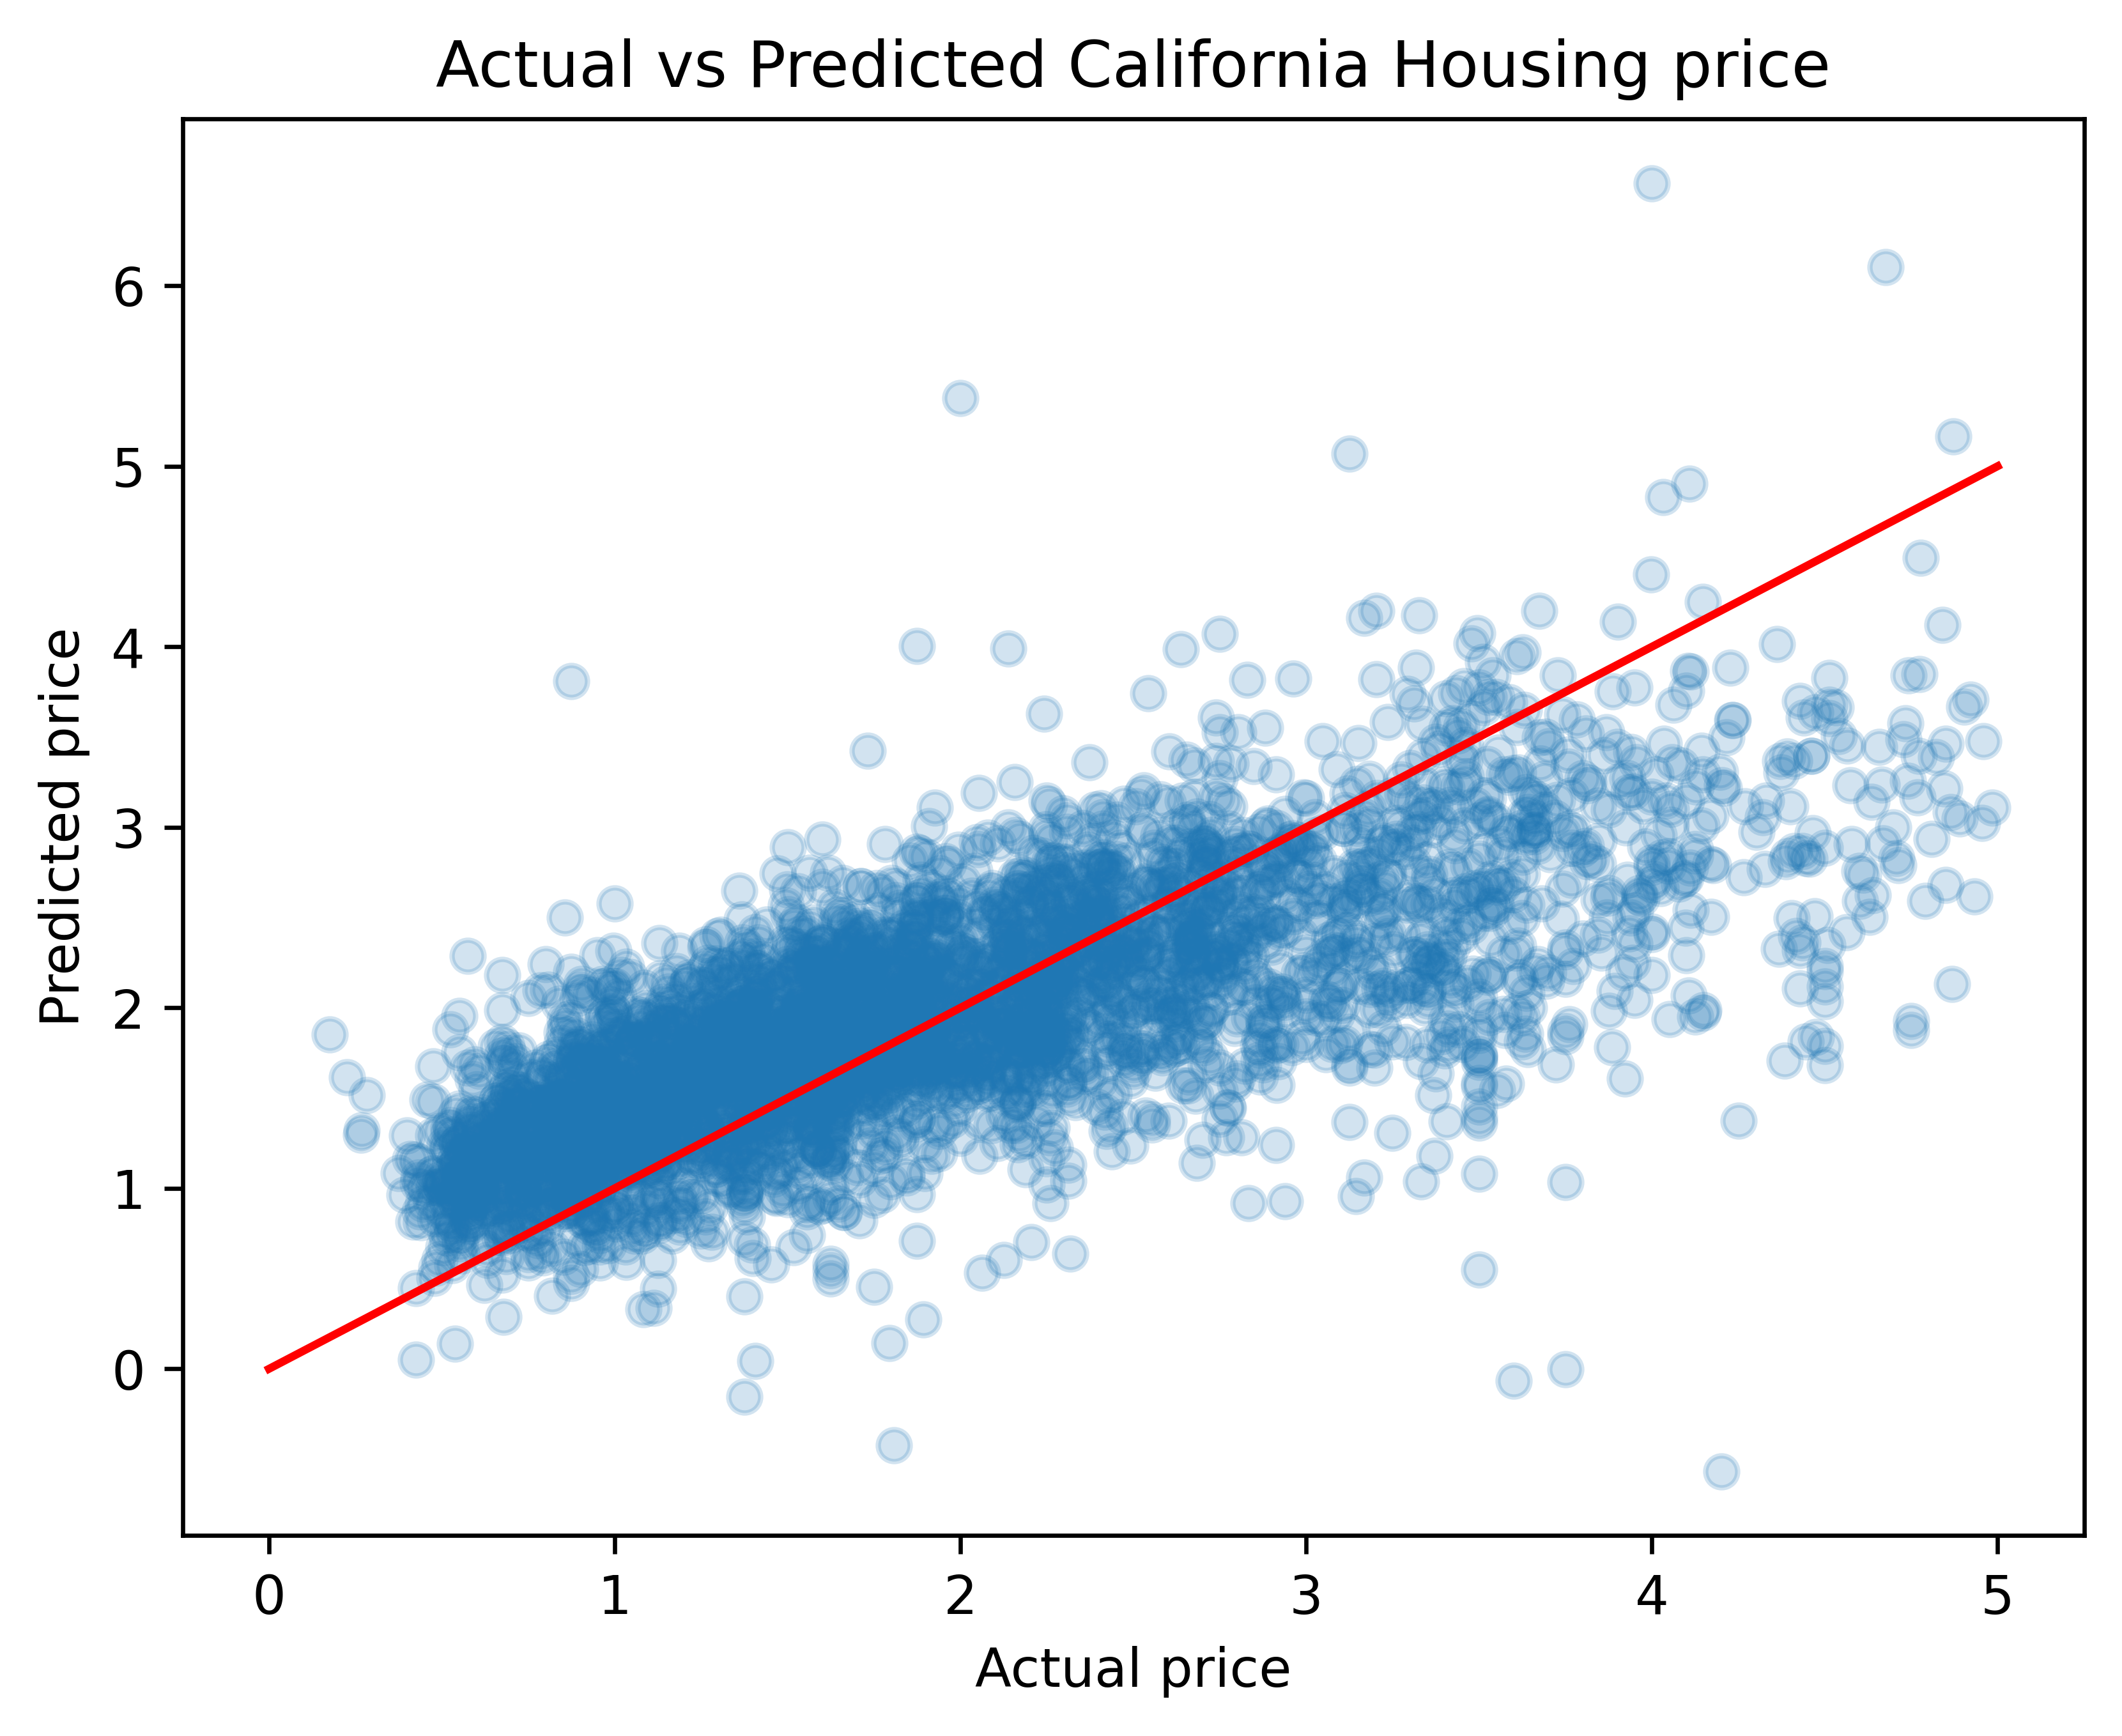

In [38]:
import matplotlib.pyplot as plt

plt.title('Actual vs Predicted California Housing price') 
plt.xlabel('Actual price') 
plt.ylabel('Predicted price') 
plt.scatter(y_test,y_predict,alpha=.2)
plt.plot([0, 5], [0, 5],"r-") 

plt.show()

RMSE is a better indicator. No idea with r2 is getting worse when taking out bad data.

https://learning.oreilly.com/library/view/machine-learning-for/9781449330514/ch05.html#:-:text=The%20solution%20to%20this%20prob,ts%E2%80%99%20algorithms%20performed.

Original Prediction
R2 is: 0.5332575128677686
MSE is: 0.6122218466726029

Filtered Prediction
R2 is: 0.5159223449106703
MSE is: 0.4582190705946869

In [39]:
df_date_format = pd.read_csv('ncaa_data_full_champyear.csv', parse_dates=[6])
print(df_date_format.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Team               54 non-null     object        
 1   Rank               54 non-null     float64       
 2   Ave                54 non-null     float64       
 3   Points             54 non-null     float64       
 4   Wins               54 non-null     float64       
 5   Conference         54 non-null     object        
 6   Last Championship  16 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 3.2+ KB
None


In [40]:
df_date_format['last_champ_year'] = df_date_format['Last Championship'].dt.year
df_date_format.iloc[:6,-3:]

Conference Last Championship  last_champ_year
0        SEC        2020-01-01           2020.0
1      BIG10        2014-01-01           2014.0
2        SEC        2019-01-01           2019.0
3        SEC        2021-01-01           2021.0
4        ACC        2018-01-01           2018.0
5      PAC12               NaT              NaN

In [41]:
df_date_format['Last Championship'].dt.year

0     2020.0
1     2014.0
2     2019.0
3     2021.0
4     2018.0
5        NaN
6     2004.0
7     2039.0
8     1988.0
9     2000.0
10    2001.0
11    2008.0
12    1997.0
13       NaN
14    2005.0
15       NaN
16       NaN
17       NaN
18    2010.0
19       NaN
20       NaN
21    2013.0
22    1998.0
23       NaN
24       NaN
25       NaN
26       NaN
27       NaN
28       NaN
29       NaN
30       NaN
31       NaN
32       NaN
33       NaN
34       NaN
35       NaN
36       NaN
37       NaN
38       NaN
39       NaN
40       NaN
41       NaN
42       NaN
43       NaN
44       NaN
45       NaN
46       NaN
47       NaN
48       NaN
49       NaN
50       NaN
51       NaN
52       NaN
53       NaN
54       NaN
55       NaN
Name: Last Championship, dtype: float64

In [42]:
import pandas as pd

dates = pd.Series(['09/10/1956', '7/05/1957', '9/08/1981', '06/10/1983', '07/13/1987', '9/14/1990', '5/02/1992', '10/08/1994'])
dates_df = pd.to_datetime(dates, infer_datetime_format=True)
dates_df

0   1956-09-10
1   1957-07-05
2   1981-09-08
3   1983-06-10
4   1987-07-13
5   1990-09-14
6   1992-05-02
7   1994-10-08
dtype: datetime64[ns]